In [3]:
import pandas as pd
import pickle
import numpy as np
import xgboost
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, KFold,StratifiedShuffleSplit
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score,roc_auc_score, roc_curve, average_precision_score,precision_recall_curve
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
pd.set_option("display.max_columns",80)

In [2]:
import os
if os.path.exists("demofile3.csv"):
  os.remove("demofile3.csv")
else:
  print("The file does not exist")

f = open("demofile3.csv", "a")
filed = 'NUMACC,distance,rain,temperatur,wind,ROAD_TYPE,SURFACE,LANE,ONEWAY,Speed'
a=input()
b=input()
lane = ''
if int(a) == 2:
   lane = '0,1,0,0,0' 
elif int(a) == 3:
    lane = '0,0,1,0,0'
wind = float(b)
f.write(filed)    
f.write(f"\n{lane},{wind} ")

f.close()


In [15]:
import joblib
dataset = r"E:\StudyLAB\1_2564\499\code\demofile3.csv"
df = pd.read_csv(dataset)
df = df.dropna(how='any', axis=0)
df.head(5)
feature_names = df.columns.tolist()
feature_sel = range(len(feature_names))
fnames = np.array(feature_names)[feature_sel]
X = df.values
ddata = xgboost.DMatrix(X, feature_names=fnames)
model = joblib.load('accmodel.joblib')
a = model.predict(ddata)
print(a)

[0.14212364]


In [3]:
dataset = r"E:\StudyLAB\1_2564\499\dataset\test_2.csv"
df = pd.read_csv(dataset)
df = df.dropna(how='any',axis=0)
df.shape
print(df)

      NUMACC  distance  rain  temperatur  wind  ROAD_TYPE  SURFACE  LANE  \
0          1    174.60  2.22       27.82  3.80          3        2     2   
1          1    111.78  0.56       28.66  5.63          1        1     2   
2          1     92.26  2.50       27.84  7.13          3        2     2   
3          1     88.52  1.74       26.33  3.91          3        2     2   
4          0     67.56  3.58       27.01  3.63          1        1     2   
...      ...       ...   ...         ...   ...        ...      ...   ...   
1586       0    257.70  0.42       28.07  5.32          6        2     2   
1587       1     85.71  0.79       32.28  7.26          3        2     2   
1588       1    152.40  1.29       25.56  4.72          3        2     4   
1589       0     38.60  0.17       29.24  3.93          6        2     3   
1590       0     52.77  1.04       28.56  6.27          3        2     2   

      ONEWAY  Speed  
0          1     45  
1          0     70  
2          0     45  

In [4]:
cm_field = ['ROAD_TYPE','SURFACE','ONEWAY','LANE']
df_cm = pd.get_dummies(df,columns=cm_field)
cm_feature_names = pd.get_dummies(df[cm_field],columns=cm_field).columns.tolist()
df_cm.head(20)
# print(cm_feature_names)

,NUMACC,distance,rain,temperatur,wind,Speed,ROAD_TYPE_1,ROAD_TYPE_2,ROAD_TYPE_3,ROAD_TYPE_5,ROAD_TYPE_6,ROAD_TYPE_7,ROAD_TYPE_8,ROAD_TYPE_9,SURFACE_1,SURFACE_2,SURFACE_9,ONEWAY_0,ONEWAY_1,LANE_1,LANE_2,LANE_3,LANE_4,LANE_6
0,1,174.60,2.22,27.82,3.80,45,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
1,1,111.78,0.56,28.66,5.63,70,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
2,1,92.26,2.50,27.84,7.13,45,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0
3,1,88.52,1.74,26.33,3.91,45,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
4,0,67.56,3.58,27.01,3.63,80,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
5,0,61.22,12.17,27.86,4.08,80,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
6,1,334.34,1.70,28.97,3.29,45,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0
7,1,63.69,1.12,28.79,3.66,45,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
8,0,63.69,1.64,26.42,3.06,70,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0
9,1,69.88,0.14,27.68,10.89,55,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0


In [5]:
df['Speed'].astype('float')

0       45.0
1       70.0
2       45.0
3       45.0
4       80.0
        ... 
1586    45.0
1587    80.0
1588    45.0
1589    45.0
1590    80.0
Name: Speed, Length: 1591, dtype: float64

In [6]:
df
float_feature_names =['distance','rain','temperatur','wind','Speed']

float_features = df_cm.xs(float_feature_names,axis=1).values
scaler = StandardScaler()
float_scaled = scaler.fit_transform(float_features)
print (float_features.mean(axis=0))

with open('scalers.pkl','wb') as fp:
    pickle.dump(scaler,fp)

[173.26080453   2.34109994  26.88800126   4.2772973   51.71590195]


In [7]:
y = df['NUMACC'].values
df_cm = df_cm.xs(float_feature_names+cm_feature_names,axis=1)

In [11]:
X= df_cm.values
y = df['NUMACC'].values
feature_names = df_cm.columns.tolist()


In [9]:
wrangler = {
    'scaler': scaler,
    'float_feature_names': float_feature_names,
    'cm_fields': cm_field,
    'feature_names': feature_names,
   
}
with open('wrangler_new.pkl','wb') as fp:
    pickle.dump(wrangler,fp)

In [12]:
feature_sel = range(len(feature_names))
#feature_sel = [-1,-2,-3]
Xs = X[:,feature_sel]
print(Xs)
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.1)#, random_state=2)
fnames = np.array(feature_names)[feature_sel]

dtrain = xgboost.DMatrix(X_train,label=y_train,feature_names=fnames)
dtest =  xgboost.DMatrix(X_test,label=y_test,feature_names=fnames)


params = {
    'max_depth':6,
    'min_child_weight': 5.0,
    'reg_lambda': 1.0,
    'reg_alpha':0.0,
    'scale_pos_weight':1.0,
    'eval_metric':'auc',
    'objective':'binary:logistic',
    'eta':0.5
}

[[1.7460e+02 2.2200e+00 2.7820e+01 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.1178e+02 5.6000e-01 2.8660e+01 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [9.2260e+01 2.5000e+00 2.7840e+01 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 ...
 [1.5240e+02 1.2900e+00 2.5560e+01 ... 0.0000e+00 1.0000e+00 0.0000e+00]
 [3.8600e+01 1.7000e-01 2.9240e+01 ... 1.0000e+00 0.0000e+00 0.0000e+00]
 [5.2770e+01 1.0400e+00 2.8560e+01 ... 0.0000e+00 0.0000e+00 0.0000e+00]]


In [13]:
booster = xgboost.train(params,dtrain,
    evals = [(dtest, 'eval')],
    num_boost_round=3000,
    early_stopping_rounds=25
)

[0]	eval-auc:0.73673
[1]	eval-auc:0.78558
[2]	eval-auc:0.79809
[3]	eval-auc:0.81575
[4]	eval-auc:0.82987
[5]	eval-auc:0.83367
[6]	eval-auc:0.84297
[7]	eval-auc:0.84770
[8]	eval-auc:0.84703
[9]	eval-auc:0.86055
[10]	eval-auc:0.86224
[11]	eval-auc:0.86376
[12]	eval-auc:0.86427
[13]	eval-auc:0.87475
[14]	eval-auc:0.88320
[15]	eval-auc:0.89097
[16]	eval-auc:0.89300
[17]	eval-auc:0.90145
[18]	eval-auc:0.90483
[19]	eval-auc:0.91007
[20]	eval-auc:0.90974
[21]	eval-auc:0.90788
[22]	eval-auc:0.91075
[23]	eval-auc:0.91971
[24]	eval-auc:0.91870
[25]	eval-auc:0.92309
[26]	eval-auc:0.92140
[27]	eval-auc:0.91785
[28]	eval-auc:0.92089
[29]	eval-auc:0.91870
[30]	eval-auc:0.92174
[31]	eval-auc:0.92022
[32]	eval-auc:0.92208
[33]	eval-auc:0.92495
[34]	eval-auc:0.92698
[35]	eval-auc:0.92934
[36]	eval-auc:0.93019
[37]	eval-auc:0.93289
[38]	eval-auc:0.93087
[39]	eval-auc:0.93036
[40]	eval-auc:0.93103
[41]	eval-auc:0.93273
[42]	eval-auc:0.93188
[43]	eval-auc:0.93408
[44]	eval-auc:0.93560
[45]	eval-auc:0.9332

In [24]:

newdata = r"E:\StudyLAB\1_2564\499\dataset\newdata.csv"
df2 = pd.read_csv("demofile2_tem.csv")
df2 = df2.dropna(how='any',axis=0)
df2.head()


,distance,rain,temperatur,wind,Speed,ROAD_TYPE_1,ROAD_TYPE_2,ROAD_TYPE_3,ROAD_TYPE_5,ROAD_TYPE_6,ROAD_TYPE_7,ROAD_TYPE_8,ROAD_TYPE_9,SURFACE_1,SURFACE_2,SURFACE_9,ONEWAY_0,ONEWAY_1,LANE_1,LANE_2,LANE_3,LANE_4,LANE_6
0,31.66,4.11,26.12,4.18,80,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
1,84.61,0.70,26.64,3.33,45,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0


In [25]:
feature_sel = range(len(feature_names))
#feature_sel = [-1,-2,-3]
Xs = X[:,feature_sel]
fnames = np.array(feature_names)[feature_sel]
ddata = xgboost.DMatrix(df2,feature_names=fnames)
print(ddata)


In [26]:
booster.predict(ddata)


array([0.98561084, 0.99397415], dtype=float32)

In [ ]:
kfold = KFold(n_splits=10)
results = cross_val_score(booster, X_train, y_train, cv=kfold)
y_test_pred = booster.predict(X_test)

mse = mean_squared_error(y_test_pred, y_test)

y_pred = booster.predict(X_test)

In [42]:
pred=booster.predict(dtest)
# Rs = r2_score(y_test, pred)
rmse=np.sqrt(mean_squared_error(y_test,pred))
# print('The R-squared is {:.4}'.format(Rs))
print('The root mean squared is {:.4}'.format(rmse))


The root mean squared is 0.2688


In [ ]:
print(fnames)

['distance' 'rain' 'temperatur' 'wind' 'Speed' 'ROAD_TYPE_1' 'ROAD_TYPE_2'
 'ROAD_TYPE_3' 'ROAD_TYPE_5' 'ROAD_TYPE_6' 'ROAD_TYPE_7' 'ROAD_TYPE_8'
 'ROAD_TYPE_9' 'SURFACE_1' 'SURFACE_2' 'SURFACE_9' 'ONEWAY_0' 'ONEWAY_1'
 'LANE_1' 'LANE_2' 'LANE_3' 'LANE_4' 'LANE_6']


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

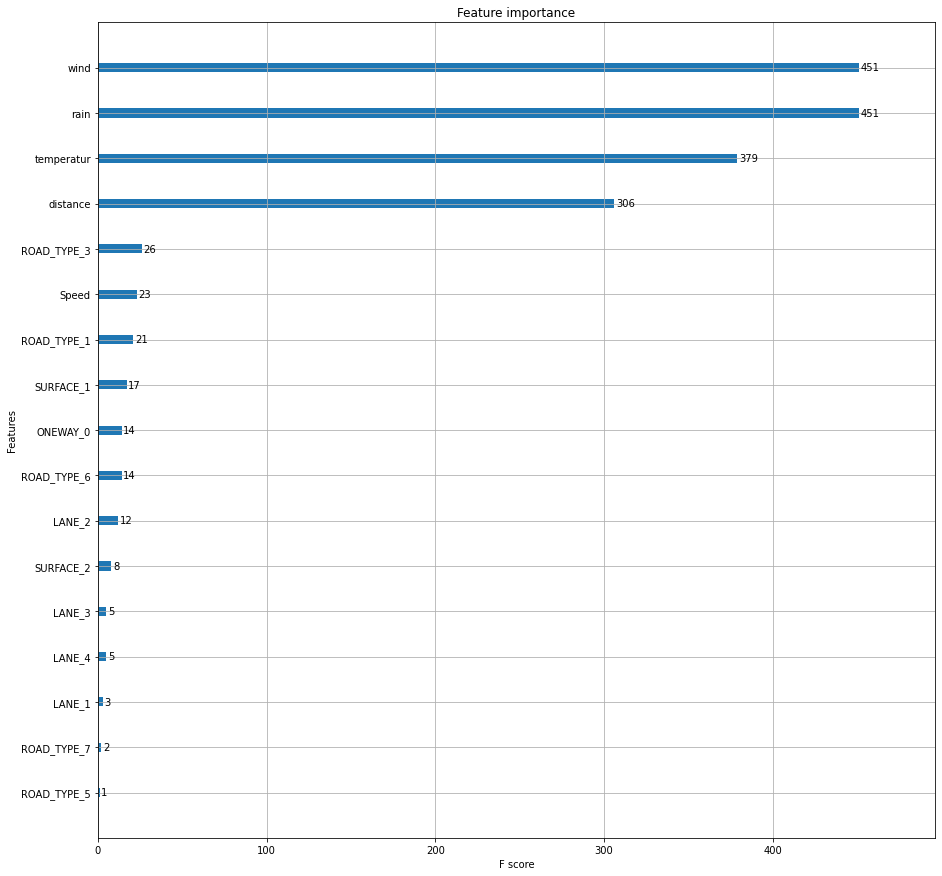

In [ ]:
plt.figure(figsize=(15,15))
xgboost.plot_importance(booster,ax=plt.gca(),importance_type='weight')

In [ ]:
booster.save_model('new_0001.model')

In [ ]:
booster.predict(dtest)

array([0.00585669, 0.97869337, 0.9447473 , 0.04938242, 0.9953969 ,
       0.97753704, 0.999108  , 0.00193452, 0.04732576, 0.9999151 ,
       0.4282841 , 0.9862136 , 0.17129347, 0.9385307 , 0.86276907,
       0.99691856, 0.93691087, 0.81661147, 0.6961373 , 0.58045226,
       0.9836572 , 0.97724   , 0.5827386 , 0.03787158, 0.01063497,
       0.9898673 , 0.8135611 , 0.9944108 , 0.96464056, 0.85678333,
       0.9984617 , 0.87502533, 0.99977785, 0.9972174 , 0.99136955,
       0.9583154 , 0.00151901, 0.7285837 , 0.01325481, 0.18595076,
       0.1838924 , 0.99491346, 0.83261824, 0.9994547 , 0.1250883 ,
       0.92531073, 0.5567917 , 0.99745196, 0.0605216 , 0.98450965,
       0.5808486 , 0.03014101, 0.9950872 , 0.993697  , 0.99325645,
       0.967172  , 0.00137157, 0.9813256 , 0.99468356, 0.00600797,
       0.9696434 , 0.95876884, 0.9819313 , 0.7866076 , 0.36311308,
       0.94708985, 0.9804786 , 0.5122657 , 0.99491787, 0.98632044,
       0.25819454, 0.99504185, 0.98716974, 0.9822557 , 0.99516

[4.5569692e-02 9.8768139e-01 9.6977770e-01 2.1583419e-02 9.9725831e-01
 9.9361551e-01 9.9874520e-01 5.7106488e-03 4.9746845e-02 9.9855989e-01
 6.1066911e-02 9.9767786e-01 4.2117342e-02 9.6488881e-01 9.3893260e-01
 9.9299991e-01 9.6381152e-01 8.9881068e-01 9.8117948e-02 9.4191653e-01
 9.8974282e-01 9.7990775e-01 7.6018654e-02 8.0580842e-03 1.2820231e-02
 9.8784500e-01 9.2395312e-01 9.8860478e-01 9.5249045e-01 2.2638947e-01
 9.9953914e-01 9.6844250e-01 9.9963844e-01 9.9759549e-01 9.8330933e-01
 6.2734038e-02 6.2698364e-04 1.0611326e-01 1.5692141e-02 6.4724043e-02
 5.3000309e-02 9.9182242e-01 9.3733948e-01 9.9979800e-01 2.7272860e-02
 9.7741222e-01 9.3273437e-01 9.9798620e-01 5.8232807e-02 9.9673909e-01
 1.6406852e-01 2.3976777e-02 9.9876261e-01 9.9236685e-01 9.9823952e-01
 9.8031163e-01 8.9391309e-04 9.7540671e-01 9.9700111e-01 2.6314224e-03
 9.8462969e-01 9.8352122e-01 9.8469156e-01 9.7319061e-01 2.8961346e-01
 9.3523592e-01 9.7690374e-01 9.4754434e-01 9.9891281e-01 9.8059344e-01
 2.899

C:\Users\Baannana\AppData\Local\Temp/ipykernel_2704/2246973727.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot([0,1],[0,1],'r-',label='Random Guess',color='orange',lw=3)
C:\Users\Baannana\AppData\Local\Temp/ipykernel_2704/2246973727.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:" (-> color='r'). The keyword argument will take precedence.
  plt.plot(fpr_train,tpr_train,'r:',label='ROC (Train)',color='steelblue',lw=3)


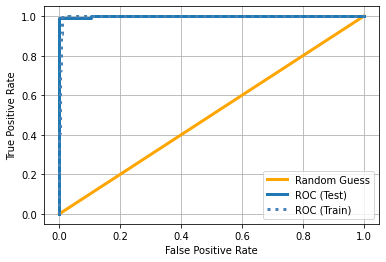

In [ ]:
y_pred_test = booster.predict(dtest)


fpr, tpr, thresholds = roc_curve(y_test,y_pred_test)

y_pred_train = booster.predict(dtrain)
fpr_train, tpr_train, thresholds_train = roc_curve(y_train,y_pred_train)
fig,ax = plt.subplots()
plt.plot([0,1],[0,1],'r-',label='Random Guess',color='orange',lw=3)
plt.plot(fpr,tpr,label='ROC (Test)',lw=3)
plt.plot(fpr_train,tpr_train,'r:',label='ROC (Train)',color='steelblue',lw=3)
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

C:\Users\Baannana\AppData\Local\Temp/ipykernel_2704/1872685969.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(thresholds,tpr,'r-',label='TPR (Test)',color='orange',lw=3)
C:\Users\Baannana\AppData\Local\Temp/ipykernel_2704/1872685969.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:" (-> color='r'). The keyword argument will take precedence.
  plt.plot(thresholds_train,tpr_train,'r:',label='TPR (Train',color='orange',lw=3)
C:\Users\Baannana\AppData\Local\Temp/ipykernel_2704/1872685969.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(thresholds,fpr,'r-',label='FPR (Test)',color='steelblue',lw=3)
C:\Users\Baannana\AppData\Local\Temp/ipykernel_2704/1872685969.py:4: UserWarning: color is red

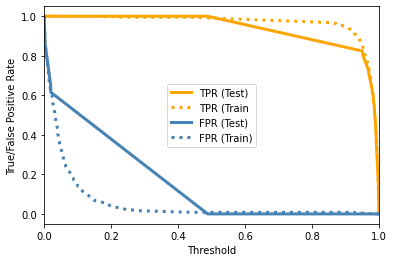

In [ ]:

plt.plot(thresholds,tpr,'r-',label='TPR (Test)',color='orange',lw=3)
plt.plot(thresholds_train,tpr_train,'r:',label='TPR (Train',color='orange',lw=3)
plt.plot(thresholds,fpr,'r-',label='FPR (Test)',color='steelblue',lw=3)
plt.plot(thresholds_train,fpr_train,'r:',label='FPR (Train)',color='steelblue',lw=3)
plt.gca().set_xbound(lower=0,upper=1)
plt.xlabel('Threshold')
plt.ylabel('True/False Positive Rate')
plt.legend()

'3.4.0'

<Figure size 1080x1080 with 0 Axes>

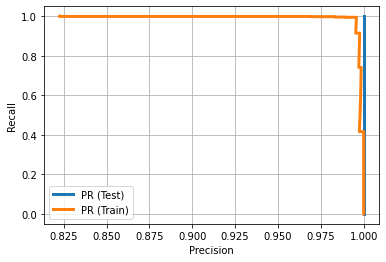

In [ ]:

plt.figure(figsize=(15,15))

y_pred_test = booster.predict(dtest)
y_pred_train = booster.predict(dtrain)

precision,recall,thresholds = precision_recall_curve(y_test,y_pred_test)
precision_train, recall_train, thresholds_train = precision_recall_curve(y_train,y_pred_train)
fig,ax = plt.subplots()
plt.plot(precision,recall,label='PR (Test)',lw=3)
plt.plot(precision_train,recall_train,label='PR (Train)',lw=3)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.grid()
plt.legend()
plt.matplotlib.__version__

C:\Users\Baannana\AppData\Local\Temp/ipykernel_2704/1391377442.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(thresholds,precision[:-1],'r-',label='P (Test)',color='orange',lw=3)
C:\Users\Baannana\AppData\Local\Temp/ipykernel_2704/1391377442.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:" (-> color='r'). The keyword argument will take precedence.
  plt.plot(thresholds_train,precision_train[:-1],'r:',label='P (Train',color='orange',lw=3)
C:\Users\Baannana\AppData\Local\Temp/ipykernel_2704/1391377442.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(thresholds,recall[:-1],'r-',label='R (Test)',color='steelblue',lw=3)
C:\Users\Baannana\AppData\Local\Temp/ipykernel_2704/1391377442.py:4: U

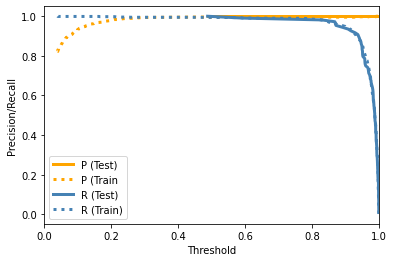

In [ ]:
plt.plot(thresholds,precision[:-1],'r-',label='P (Test)',color='orange',lw=3)
plt.plot(thresholds_train,precision_train[:-1],'r:',label='P (Train',color='orange',lw=3)
plt.plot(thresholds,recall[:-1],'r-',label='R (Test)',color='steelblue',lw=3)
plt.plot(thresholds_train,recall_train[:-1],'r:',label='R (Train)',color='steelblue',lw=3)
#plt.plot([0,1],[0,1],'k-',lw=2)
plt.gca().set_xbound(lower=0,upper=1)
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()

In [ ]:
y_pred_test = booster.predict(dtest) > 0.19
print ('Test Accuracy:',accuracy_score(y_test,y_pred_test))
print ('Test F1:',f1_score(y_test,y_pred_test))
print ('Test Precision:',precision_score(y_test,y_pred_test))
print ('Test Recall:',recall_score(y_test,y_pred_test))
y_pred_test = booster.predict(dtest)
print ('Test AUC:',roc_auc_score(y_test,y_pred_test))
print ('Test AP:',average_precision_score(y_test,y_pred_test))

y_pred_train = booster.predict(dtrain) > 0.19
print ('Train Accuracy:',accuracy_score(y_train,y_pred_train))
print ('Train F1:',f1_score(y_train,y_pred_train))
print ('Train Precision:',precision_score(y_train,y_pred_train))
print ('Train Recall:',recall_score(y_train,y_pred_train))
y_pred_train = booster.predict(dtrain)
print ('Train AUC:',roc_auc_score(y_train,y_pred_train))
print ('Test AP:',average_precision_score(y_train,y_pred_train))

Test Accuracy: 0.975
Test F1: 0.9818181818181818
Test Precision: 0.9642857142857143
Test Recall: 1.0
Test AUC: 1.0
Test AP: 1.0
Train Accuracy: 0.983927323549965
Train F1: 0.9879644165358451
Train Precision: 0.9782383419689119
Train Recall: 0.9978858350951374
Train AUC: 0.997351844990301
Test AP: 0.9983300774027801


In [ ]:
def plot_split_histogram(feature_name):
    hist = booster.get_split_value_histogram(feature_name)
    try:
        i = float_feature_names.index(feature_name)
        fake_data = np.zeros((hist.Count.size,len(float_feature_names)))
        fake_data[:,i] = hist.SplitValue
        hist.loc[:,'SplitValue'] = scaler.inverse_transform(fake_data)[:,i]
    except: pass
    hist.plot(kind='area',x='SplitValue',y='Count')

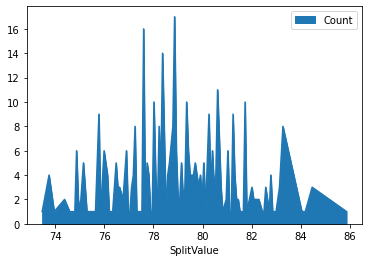

In [ ]:
plot_split_histogram('temperatur')

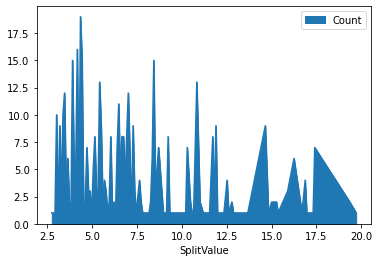

In [ ]:
plot_split_histogram('rain')

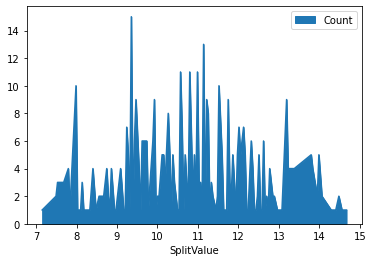

In [ ]:
plot_split_histogram('wind')

ImportError: You must install graphviz to plot tree

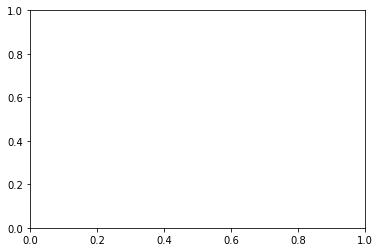

In [ ]:
xgboost.plot_tree(booster,num_trees=1)
plt.rcParams['figure.figsize'] = [50, 50]
plt.show()